Problem 2

Given a list of planets discovered by KEPLER.

Kepler Data: https://drive.google.com/drive/folders/1GwqC4STc_KgVPofacQUzKHBMHQsmflvY?usp=sharing

Create an ML algorithm to classify the planets as Candidate/False positive/Confirmed etc based on the  column “koi_disposition”.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kepler_data.csv", comment="#")

In [3]:
# Display the first few rows of the dataset
df.head()


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
df.shape

(9564, 49)

In [5]:
# Summary statistics
df.describe()


,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [7]:
## Check missing values
df.isnull().sum()



kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [8]:
## Check Duplicates
df.duplicated().sum()

0

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [10]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [11]:
numerical_features

['kepid',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [12]:
categorical_feature

['kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_tce_delivname']

In [13]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [14]:
df['kepoi_name'].unique()

array(['K00752.01', 'K00752.02', 'K00753.01', ..., 'K07987.01',
       'K07988.01', 'K07989.01'], dtype=object)

In [15]:
df['kepler_name'].unique()

array(['Kepler-227 b', 'Kepler-227 c', nan, ..., 'Kepler-445 d',
       'Kepler-452 b', 'Kepler-1629 b'], dtype=object)

In [16]:
df['koi_pdisposition'].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [17]:
df['koi_tce_delivname'].unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [18]:
# Drop irrelevant columns
df = df.drop(columns=['kepler_name', 'kepoi_name'])

In [19]:
# Convert 'koi_disposition' to numerical using label encoding
label_map = {'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2}
df['koi_disposition'] = df['koi_disposition'].map(label_map)

In [20]:
df.columns

Index(['kepid', 'koi_disposition', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1',
       'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [21]:
# One-Hot Encoding for 'koi_pdisposition' column
df = pd.get_dummies(df, columns=['koi_pdisposition'], prefix='koi_pdis')

In [22]:
mode_value=df[df['koi_tce_delivname'].notna()]['koi_tce_delivname'].mode()[0]

In [23]:
df['koi_tce_delivname']=df['koi_tce_delivname'].fillna(mode_value)

In [24]:
df['koi_tce_delivname'].unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', 'q1_q17_dr24_tce'], dtype=object)

In [25]:
# One-Hot Encoding for 'koi_tce_delivname' column
df = pd.get_dummies(df, columns=['koi_tce_delivname'], prefix='koi_tce_dis')

In [26]:
df.head()

,kepid,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_pdis_CANDIDATE,koi_pdis_FALSE POSITIVE,koi_tce_dis_q1_q16_tce,koi_tce_dis_q1_q17_dr24_tce,koi_tce_dis_q1_q17_dr25_tce
0,10797460,0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,0.105,-0.061,291.93423,48.141651,15.347,1,0,0,0,1
1,10797460,0,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,0.105,-0.061,291.93423,48.141651,15.347,1,0,0,0,1
2,10811496,1,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,...,0.233,-0.078,297.00482,48.134129,15.436,1,0,0,0,1
3,10848459,2,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,0.201,-0.067,285.53461,48.285210,15.597,0,1,0,0,1
4,10854555,0,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,0.334,-0.133,288.75488,48.226200,15.509,1,0,0,0,1


In [27]:
df = df.drop(columns=['koi_teq_err1', 'koi_teq_err2'])

In [28]:
import numpy as np

# Assuming your DataFrame is named df and you have identified the outliers beforehand

# Step 1: Identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Step 2: Impute missing values with the median, considering outliers
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if outliers[col].any():
            # Use median for features with outliers
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            # Use mean for features without outliers
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)


In [29]:
## Check missing values
df.isnull().sum()

kepid                          0
koi_disposition                0
koi_score                      0
koi_fpflag_nt                  0
koi_fpflag_ss                  0
koi_fpflag_co                  0
koi_fpflag_ec                  0
koi_period                     0
koi_period_err1                0
koi_period_err2                0
koi_time0bk                    0
koi_time0bk_err1               0
koi_time0bk_err2               0
koi_impact                     0
koi_impact_err1                0
koi_impact_err2                0
koi_duration                   0
koi_duration_err1              0
koi_duration_err2              0
koi_depth                      0
koi_depth_err1                 0
koi_depth_err2                 0
koi_prad                       0
koi_prad_err1                  0
koi_prad_err2                  0
koi_teq                        0
koi_insol                      0
koi_insol_err1                 0
koi_insol_err2                 0
koi_model_snr                  0
koi_tce_pl

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   kepid                        9564 non-null   int64  
 1   koi_disposition              9564 non-null   int64  
 2   koi_score                    9564 non-null   float64
 3   koi_fpflag_nt                9564 non-null   int64  
 4   koi_fpflag_ss                9564 non-null   int64  
 5   koi_fpflag_co                9564 non-null   int64  
 6   koi_fpflag_ec                9564 non-null   int64  
 7   koi_period                   9564 non-null   float64
 8   koi_period_err1              9564 non-null   float64
 9   koi_period_err2              9564 non-null   float64
 10  koi_time0bk                  9564 non-null   float64
 11  koi_time0bk_err1             9564 non-null   float64
 12  koi_time0bk_err2             9564 non-null   float64
 13  koi_impact        

In [31]:
# Calculate the correlation matrix:
correlation_matrix = df.corr()


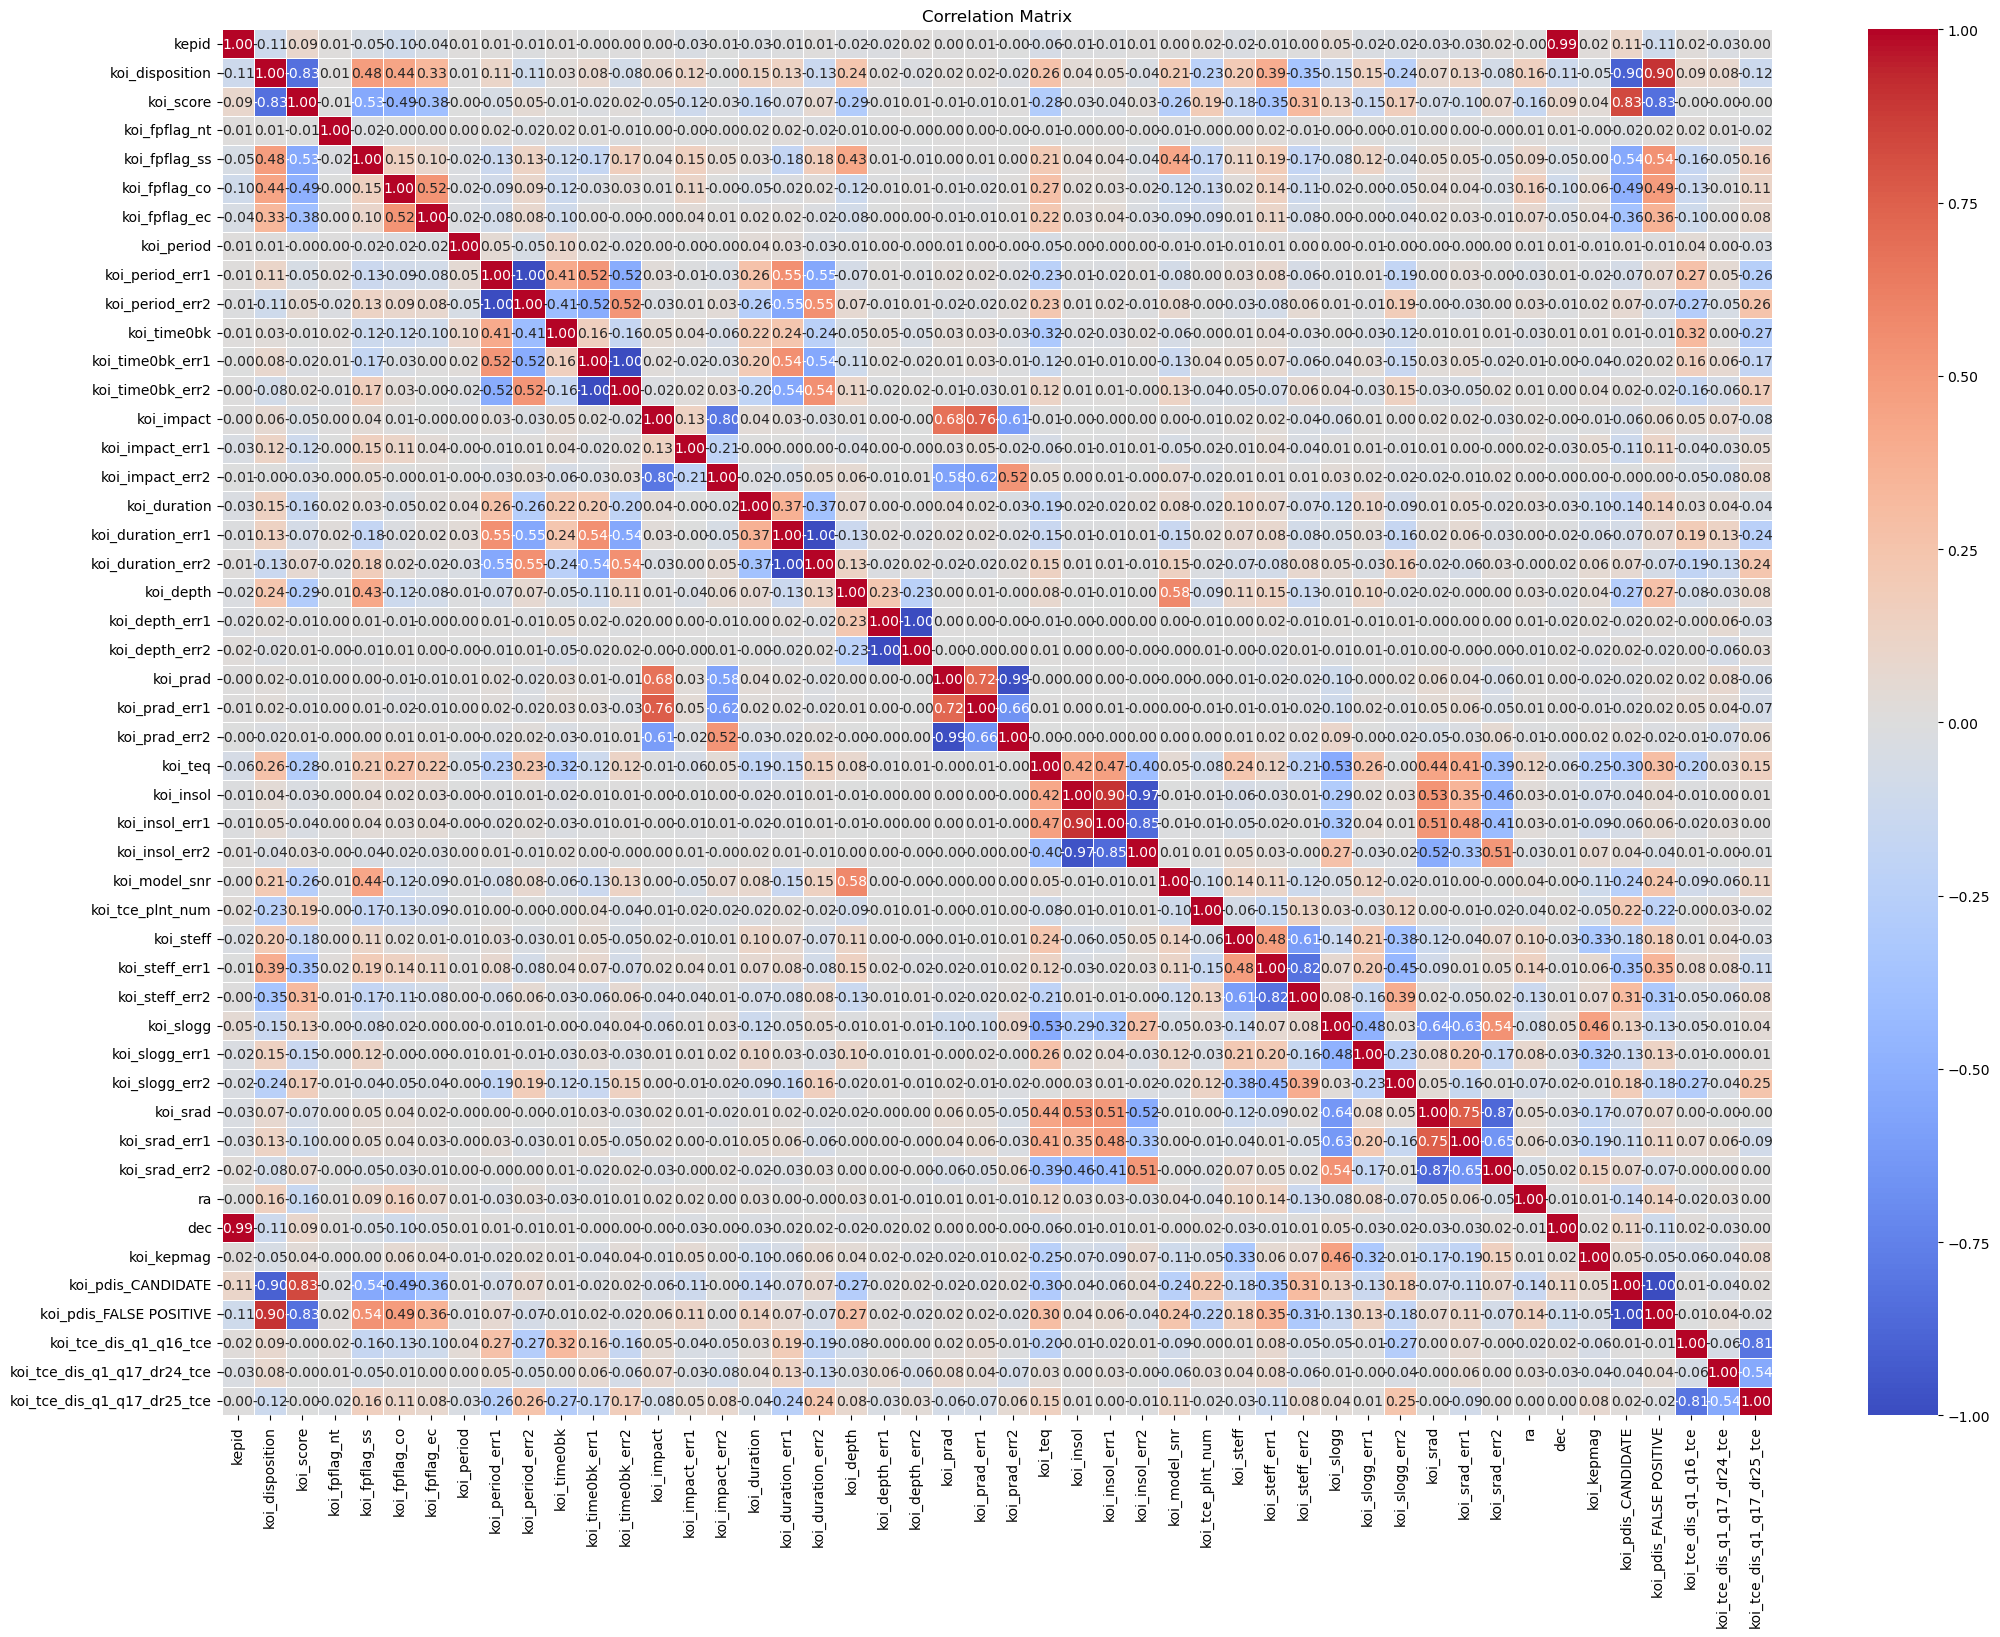

In [32]:
# Visualize the correlation matrix using a heatmap:
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [33]:
#  Split the dataset into feature matrix (X) and target variable (y)
X = df.drop('koi_disposition', axis=1)  # Assuming 'koi_disposition' is the target variable
y = df['koi_disposition']


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have your feature matrix X and target vector y
# X contains the feature data, and y contains the target variable (koi_disposition)

# Specify the number of top-K features you want to select
k = 10

# Create an instance of SelectKBest with the f_classif scoring function (ANOVA F-value between label/feature)
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your feature matrix X and target vector y
selector.fit(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Get the feature importances (scores)
feature_importances = selector.scores_[selected_indices]

# Create a DataFrame with the selected features and their importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top-K features and their importances
importance_df



,Feature,Importance
9,koi_pdis_FALSE POSITIVE,1.268875e+06
8,koi_pdis_CANDIDATE,1.268875e+06
0,koi_score,1.278819e+04
1,koi_fpflag_ss,1.929401e+03
2,koi_fpflag_co,1.511494e+03
6,koi_steff_err1,8.787917e+02
3,koi_fpflag_ec,7.342160e+02
7,koi_steff_err2,6.471379e+02
5,koi_teq,4.562828e+02
4,koi_depth,3.635925e+02


In [35]:
# Select the top features based on their importance scores
selected_features = importance_df['Feature'].values[:10]

# Extract the selected features from the original feature matrix X
X_selected = X[selected_features]

In [36]:
X_selected.head(4)

,koi_pdis_FALSE POSITIVE,koi_pdis_CANDIDATE,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_steff_err1,koi_fpflag_ec,koi_steff_err2,koi_teq,koi_depth
0,0,1,1.000,0,0,81.0,0,-81.0,793.0,615.8
1,0,1,0.969,0,0,81.0,0,-81.0,443.0,874.8
2,0,1,0.000,0,0,158.0,0,-176.0,638.0,10829.0
3,1,0,0.000,1,0,157.0,0,-174.0,1395.0,8079.2


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [39]:
# Model Selection and Evaluation
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

In [40]:
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores)} +/- {np.std(scores)}")


Logistic Regression - Accuracy: 0.8627633696631276 +/- 0.006541810487595789
Random Forest - Accuracy: 0.8839366811388174 +/- 0.006888215576003527
Gradient Boosting - Accuracy: 0.8882502358661732 +/- 0.008053263762780004
SVM - Accuracy: 0.8610639378764787 +/- 0.00608302718067251
XGBoost - Accuracy: 0.8824996264562868 +/- 0.007142167648837911


In [41]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


In [42]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')


In [43]:
# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [44]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [45]:
# Get the best model
best_model = grid_search.best_estimator_

In [46]:
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)  # Replace X_test and y_test with your test data
print("Test Accuracy with Best Model:", test_accuracy)

Test Accuracy with Best Model: 0.8734971249346576


In [48]:
import pickle

# Export the trained model
with open('gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Export the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


Sub-questions for Problem 2:

1. Why did you choose the particular algorithm?
   - I chose the particular algorithm (e.g., Logistic Regression, Random Forest, Gradient Boosting, SVM, XGBoost) based on their suitability for the classification problem at hand. These algorithms are commonly used for classification tasks and have shown good performance in various scenarios. The choice of algorithm depends on factors like the nature of the data, interpretability, computational efficiency, and the presence of non-linear relationships.
   

2. What are the different tuning methods used for the algorithm?
   - The tuning methods used for each algorithm can vary, but commonly used techniques include:
     - Grid Search: Exhaustively searches through a manually specified subset of hyperparameters to find the best combination that maximizes the performance metric.
     - Random Search: Randomly samples from a specified range of hyperparameters to find the best combination.
     - Bayesian Optimization: Uses probabilistic models to predict promising hyperparameters and updates the model based on observed performance.
     - Genetic Algorithms: Mimics the process of natural selection to evolve a population of hyperparameters over multiple generations.


3. Did you consider any other choice of algorithm? Why or why not?
   - Yes, when building a machine learning model, it's essential to consider multiple algorithms to find the one that best fits the data. I may have considered other algorithms like k-Nearest Neighbors, Support Vector Machines (SVM), Decision Trees, Naive Bayes, Neural Networks, etc., depending on the characteristics of the data and the problem. Each algorithm has its strengths and weaknesses, so it's crucial to explore and compare different approaches.
   

4. What is the accuracy?
   - The accuracy is the performance metric used to evaluate the model's classification performance. It is calculated as the ratio of correctly classified instances to the total number of instances in the test set. For example, an accuracy of 0.88 means that 88% of the test instances were classified correctly by the model.
   

5. What are the different types of metrics that can be used to evaluate the model?
   - Besides accuracy, there are several other metrics used to evaluate the performance of a classification model, including:
     - Precision: Measures the proportion of true positive predictions out of all positive predictions. It is useful when the cost of false positives is high.
     - Recall: Measures the proportion of true positive predictions out of all actual positive instances. It is useful when the cost of false negatives is high.
     - F1-score: The harmonic mean of precision and recall. Useful when there is an uneven class distribution.
     - Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Measures the area under the ROC curve and gives an indication of how well the model can distinguish between different classes.
     - Confusion Matrix: Provides a detailed breakdown of correct and incorrect predictions, including true positives, true negatives, false positives, and false negatives.